### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Car has just 108 data set only, which is too small data to utilize.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Car is problematic due to just 108 data only. Number of  to Restaurants are missing in small number of dataset but it would be OK. Filled with 

In [5]:
data["age"].replace("50plus", "50", inplace=True) # Better handling for age data.
data["age"].replace("below21", "20", inplace=True)
data["age"] = data["age"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data = data.fillna('N/A')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
coupon_accepted_count = data['Y'].sum()
total_observations = len(data)
proportion_accepted = coupon_accepted_count / total_observations
proportion_accepted

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

6. Use a histogram to visualize the temperature column.

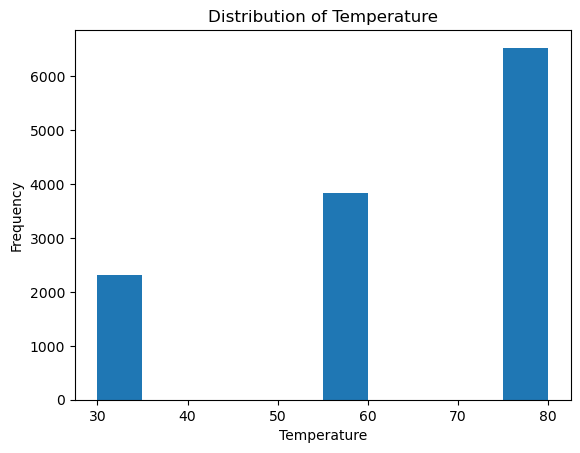

In [8]:
#plt.figure(figsize=(8, 6))
plt.hist(data['temperature'])
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
data_bar = data[data["coupon"] == "Bar"]
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   int64 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

data_bar["age"].replace("50plus", "50", inplace=True)
data_bar["age"].replace("below21", "20", inplace=True)
data_bar["age"] = data_bar["age"].astype("int64")
data_bar.info()

2. What proportion of bar coupons were accepted?


In [10]:
bar_accepted = data_bar[data_bar["Y"] == 1]
bar_accepted_ratio = len(bar_accepted) / len(data_bar)
bar_accepted_ratio

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [11]:
f_3fewer = ["never", "less1", "1~3"]
f_1more = ["1~3", "4~8", "gt8"]
f_4more = ["4~8", "gt8"]
data_bar.groupby("Bar")["Y"].count()

Bar
1~3      397
4~8      150
N/A       21
gt8       49
less1    570
never    830
Name: Y, dtype: int64

In [12]:
data_bar_3fewer = data_bar[data_bar['Bar'].isin(f_3fewer)]
bar_accepted_ratio_3fewer = data_bar_3fewer["Y"].sum() / len(data_bar_3fewer)
bar_accepted_ratio_3fewer

0.37061769616026713

In [13]:
data_bar_4more = data_bar[data_bar['Bar'].isin(f_4more)]
bar_accepted_ratio_4more = data_bar_4more["Y"].sum() / len(data_bar_4more)
bar_accepted_ratio_4more

0.7688442211055276

37% vs. 77%!!

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
# I assume this quesiton if 1 or more than once a mont
data_bar_1more = data_bar[data_bar['Bar'].isin(["1~3", "4~8", "gt8"])]

In [15]:
data_bar_1more["age"].replace("50plus", "50", inplace=True)
data_bar_1more["age"].replace("below21", "20", inplace=True)
data_bar_1more["age"] = data_bar_1more["age"].astype("int64")
data_bar_1more.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 90 to 12544
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           596 non-null    object
 1   passanger             596 non-null    object
 2   weather               596 non-null    object
 3   temperature           596 non-null    int64 
 4   time                  596 non-null    object
 5   coupon                596 non-null    object
 6   expiration            596 non-null    object
 7   gender                596 non-null    object
 8   age                   596 non-null    int64 
 9   maritalStatus         596 non-null    object
 10  has_children          596 non-null    int64 
 11  education             596 non-null    object
 12  occupation            596 non-null    object
 13  income                596 non-null    object
 14  car                   596 non-null    object
 15  Bar                   596 non-null    obje

C:\Users\a5064860\AppData\Local\Temp\ipykernel_17584\2062736116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_1more["age"].replace("50plus", "50", inplace=True)
C:\Users\a5064860\AppData\Local\Temp\ipykernel_17584\2062736116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_1more["age"].replace("below21", "20", inplace=True)
C:\Users\a5064860\AppData\Local\Temp\ipykernel_17584\2062736116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [16]:
data_bar_1more[data_bar_1more["age"] > 25]["Y"].sum() / data_bar_1more[data_bar_1more["age"] > 25]["Y"].count()

0.6952380952380952

In [17]:
data_bar["Y"].sum()

827

In [18]:
data_bar_1more[data_bar_1more["age"] > 25]["Y"].sum()

292

In [19]:
data_bar["Y"].count()

2017

In [20]:
data_bar_1more[data_bar_1more["age"] > 25]["Y"].count()

420

In [21]:
(data_bar["Y"].sum() - data_bar_1more[data_bar_1more["age"] > 25]["Y"].sum()) / (data_bar["Y"].count() - data_bar_1more[data_bar_1more["age"] > 25]["Y"].count())

0.33500313087038197

There is a huge difference 70% vs. 34%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
a = data_bar[(data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & (data_bar["passanger"] != "Kid(s)") & (data_bar["occupation"] != ("Farming Fishing & Forestry"))]["Y"].count()
b = data_bar[(data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & (data_bar["passanger"] != "Kid(s)") & (data_bar["occupation"] != ("Farming Fishing & Forestry"))]["Y"].sum()
c = b/a 
print(a)
print(b)
print(c)

551
393
0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [23]:
a = data_bar[(data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & (data_bar["passanger"] != "Kid(s)") & (data_bar["maritalStatus"] != ("Widowed"))]["Y"].count()
b = data_bar[(data_bar["Bar"].isin(["1~3", "4~8", "gt8"])) & (data_bar["passanger"] != "Kid(s)") & (data_bar["maritalStatus"] != ("Widowed"))]["Y"].sum()
c = b/a 
print(a)
print(b)
print(c)

551
393
0.7132486388384754


In [24]:
a = data_bar_1more[(data_bar_1more["age"] < 30)]["Y"].count()
b = data_bar_1more[(data_bar_1more["age"] < 30)]["Y"].sum()
c = b/a 
print(a)
print(b)
print(c)

345
249
0.7217391304347827


In [25]:
a = data_bar[(data_bar["RestaurantLessThan20"].isin(["4~8", "gt8"])) & (data_bar["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]))]["Y"].count()
b = data_bar[(data_bar["RestaurantLessThan20"].isin(["4~8", "gt8"])) & (data_bar["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]))]["Y"].sum()
c = b/a 
print(a)
print(b)
print(c)

344
156
0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Those who go to Bar frequently will be more likely to recieve the Bar coupon in general.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [26]:
data_coffee = data[data["coupon"] == "Coffee House"]
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   int64 
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   3996 non-null   object
 15  Bar                   3996 non-null   obje

5:5-15min, 15:15-25min, 25:25+min

In [27]:
data["toCoupon_GEQ5_15_25min"] = data["toCoupon_GEQ15min"].add(data["toCoupon_GEQ25min"])
data["toCoupon_GEQ5_15_25min"] = data["toCoupon_GEQ5_15_25min"]*10+5    #Tricky adjustment so values are equal to min ranges.
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,toCoupon_GEQ5_15_25min
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,N/A,4~8,1~3,1,0,0,0,1,1,5
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,N/A,4~8,1~3,1,0,0,0,1,0,5
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,N/A,4~8,1~3,1,1,0,0,1,1,15
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,N/A,4~8,1~3,1,1,0,0,1,0,15
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,N/A,4~8,1~3,1,1,0,0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,5
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,5
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,5
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,1,0,1,0,25


In [28]:
data_coffee = data[data["coupon"] == "Coffee House"]

data_temp = data_Res20_50
ratio_temp = data_temp.groupby(["toCoupon_GEQ5_15_25min", "direction_same"])["Y"].sum() / data_temp.groupby(["toCoupon_GEQ5_15_25min","direction_same"])["Y"].count()
ratio_temp

In [29]:
data_Res20_50 = data[data["coupon"] == "Restaurant(20-50)"]

All graph

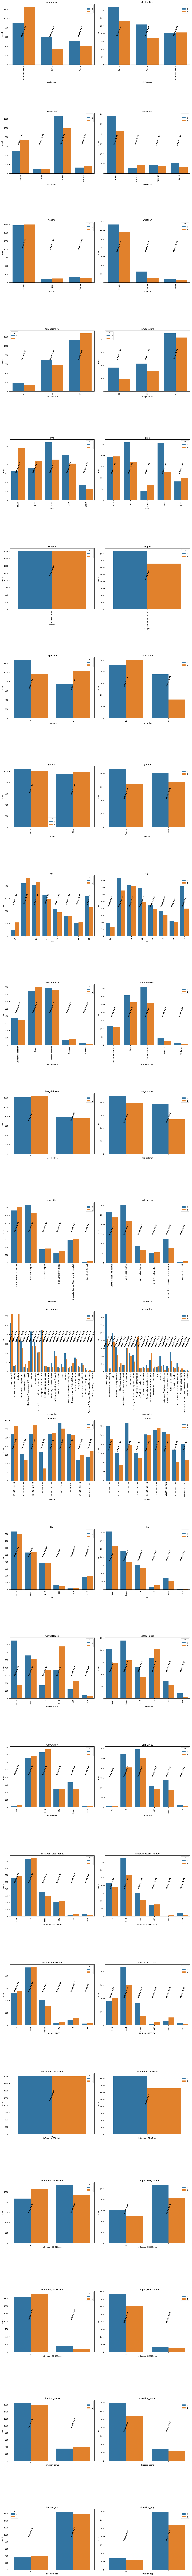

In [30]:
categorical_columns = ['destination', 'passanger',
                       'weather', 'temperature', 'time',
                       'coupon', 'expiration',
                       'gender','age',
                       'maritalStatus', 'has_children',
                       'education', 'occupation', 'income', "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50", "toCoupon_GEQ5min", "toCoupon_GEQ15min", "toCoupon_GEQ25min", "direction_same", "direction_opp"]


plt.figure(figsize=(15, 200))
#num_rows = len(categorical_columns) // 2
num_rows = 24
num_cols = 2

#for column in categorical_columns:
for i, column in enumerate(categorical_columns, start=1):

        data_temp = data_coffee
        plt.subplot(num_rows, num_cols, i*2-1)
        sns.countplot(data_temp, x=column, hue="Y")
        plt.title(column)
        plt.xticks(rotation=90)

        for category in data_temp[column].unique():
            category_mean = data_temp[data_temp[column] == category]["Y"].mean()
            plt.text(data_temp[column].unique().tolist().index(category), data_temp[column].value_counts().max() / 3,
                     f'Mean: {category_mean:.2f}', ha='center', va='center', color='black', fontweight='bold', rotation=70)

#    plt.tight_layout()
#    plt.show()

        data_temp = data_Res20_50
        plt.subplot(num_rows, num_cols, i*2)
        sns.countplot(data_temp, x=column, hue="Y")
        plt.title(column)
        plt.xticks(rotation=90)

        for category in data_temp[column].unique():
            category_mean = data_temp[data_temp[column] == category]["Y"].mean()
            plt.text(data_temp[column].unique().tolist().index(category), data_temp[column].value_counts().max() / 3,
                     f'Mean: {category_mean:.2f}', ha='center', va='center', color='black', fontweight='bold', rotation=70)

plt.tight_layout()
plt.show()


                        # Left Coffee House Graphs                                                                        # Right Restaurant $20-$50


In [31]:
c = data_Res20_50.groupby(["direction_same", "toCoupon_GEQ25min"])["Y"].sum() / data_Res20_50.groupby(["direction_same", "toCoupon_GEQ25min"])["Y"].count()
c

direction_same  toCoupon_GEQ25min
0               0                    0.437891
                1                    0.422414
1               0                    0.463035
Name: Y, dtype: float64

In [32]:
ratio_coffee = data[data["coupon"] == "Coffee House"].groupby(["toCoupon_GEQ5_15_25min", "direction_same"])["Y"].sum() / data[data["coupon"] == "Coffee House"].groupby(["toCoupon_GEQ5_15_25min","direction_same"])["Y"].count()
ratio_coffee

toCoupon_GEQ5_15_25min  direction_same
5                       0                 0.553223
                        1                 0.536503
15                      0                 0.469413
                        1                 0.509317
25                      0                 0.345161
Name: Y, dtype: float64

In [33]:
ratio_Res20_50 = data[data["coupon"] == "Restaurant(20-50)"].groupby(["toCoupon_GEQ5_15_25min", "direction_same"])["Y"].sum() / data[data["coupon"] == "Restaurant(20-50)"].groupby(["toCoupon_GEQ5_15_25min","direction_same"])["Y"].count()
ratio_Res20_50

toCoupon_GEQ5_15_25min  direction_same
5                       0                 0.450000
                        1                 0.449275
15                      0                 0.432606
                        1                 0.520000
25                      0                 0.422414
Name: Y, dtype: float64

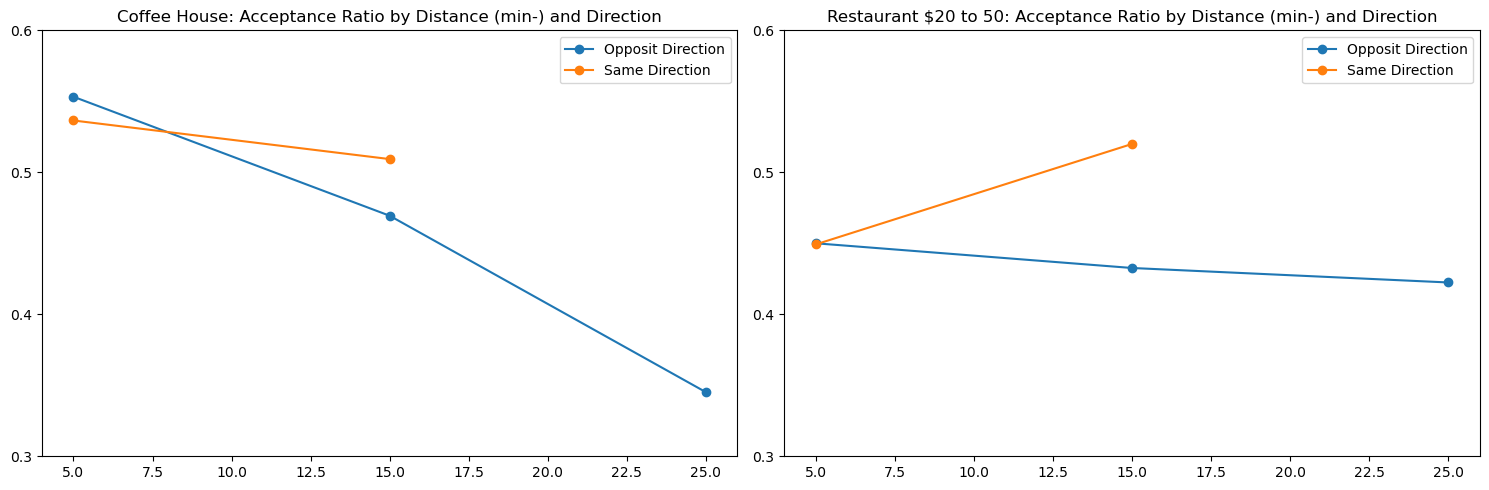

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
# First subplot
unstacked_data_coffee = ratio_coffee.unstack()
#ax1.plot(unstacked_data_coffee.index, unstacked_data_coffee.values, marker='o')
ax1.plot(unstacked_data_coffee, marker='o', label=['Opposit Direction', 'Same Direction'])

ax1.set_ylim(0.3, 0.6)
ax1.set_yticks([0.3, 0.4, 0.5, 0.6])
ax1.set_title('Coffee House: Acceptance Ratio by Distance (min-) and Direction')
ax1.legend()

# Second subplot
unstacked_data_Res20_50 = ratio_Res20_50.unstack()
ax2.plot(unstacked_data_Res20_50.index, unstacked_data_Res20_50.values, marker='o', label=['Opposit Direction', 'Same Direction'])
ax2.set_ylim(0.3, 0.6)
ax2.set_yticks([0.3, 0.4, 0.5, 0.6])
ax2.set_title('Restaurant $20 to 50: Acceptance Ratio by Distance (min-) and Direction')
ax2.legend()

plt.tight_layout()
plt.show()